In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns



In [37]:
map_df = gpd.read_file("./file/Indian_States.shp")
df = pd.read_csv("./child-crime.csv")
cyber_data  = pd.read_csv("cyber-crime.csv")
cac_data = pd.read_csv("./CAC_T.csv")
illiterates_data = pd.read_csv("./Illiteracy-rate.csv")
enrolment_data = pd.read_csv("./enrolment.csv")



df.rename({"States/UTs": "state", "Crime Head": "crime", "2014": "numberOfCrimes"}, axis=1, inplace=True)
df["year"]  = pd.Series([2014 for x in range(len(df.index))])

In [38]:
statesAndUts = df["state"].unique()

In [39]:
total_crimes = []
for i in range (0, len(statesAndUts) - 1):
    total =  df.loc[df['state'] == statesAndUts[i], 'numberOfCrimes'].sum()
    total_crimes.append([statesAndUts[i], total])

t_df = pd.DataFrame(total_crimes, columns = ['State/UTs','no_of_crimes'])
t_df.to_csv("crime.csv")


CRIME AGAINST CHILDREN IN INDIA.


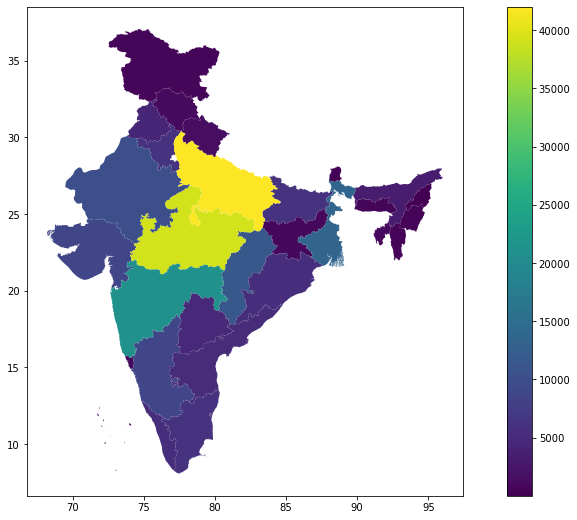

In [40]:
map_df.rename(columns = {'st_nm':'States/UTs'}, inplace = True)
merged_df = map_df.set_index('States/UTs').join(t_df.set_index('State/UTs')) 
print("CRIME AGAINST CHILDREN IN INDIA.")
merged_df.plot('no_of_crimes', figsize = (16, 9), legend = True)
plt.savefig("overall.png")


In [41]:
def compute_mode(line_object):
    x = line_object.get_xdata()
    y = line_object.get_ydata()
    mode_idx = y.argmax()
    return x[mode_idx], y[mode_idx]

In [42]:
cac_cols = cac_data.columns

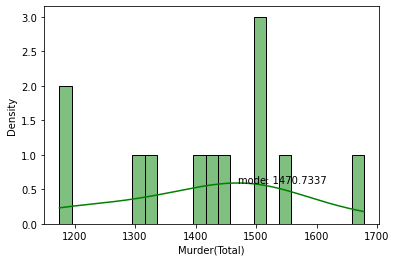

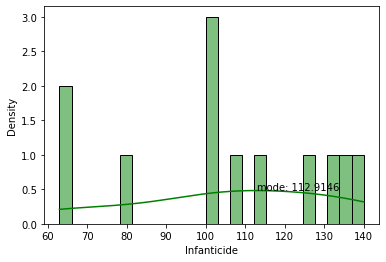

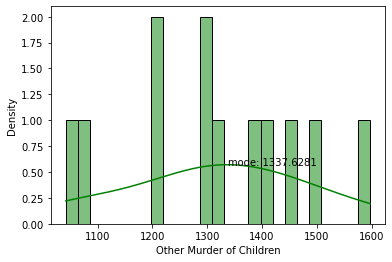

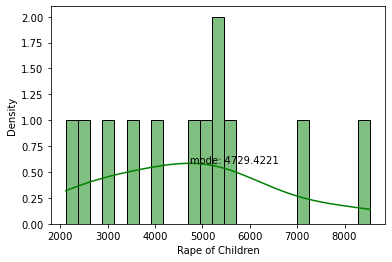

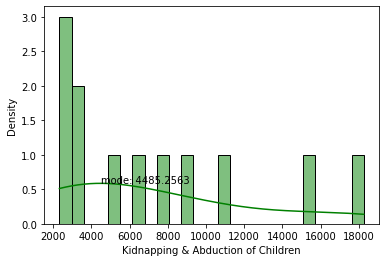

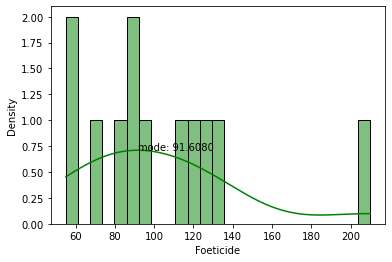

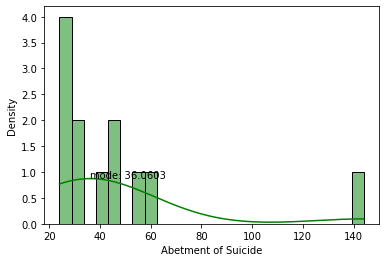

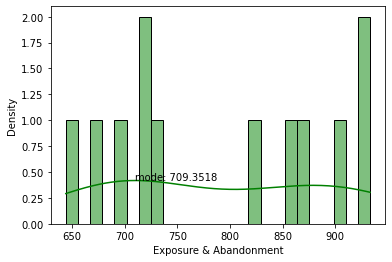

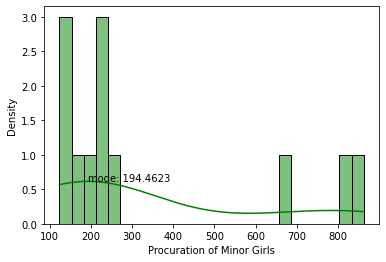

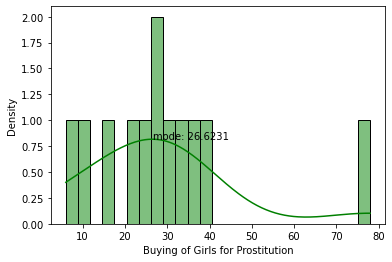

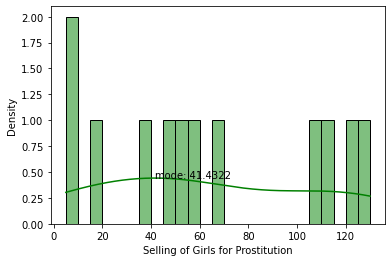

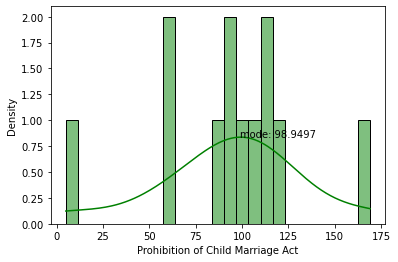

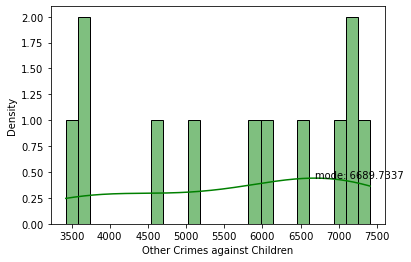

In [43]:
def make_density(layer_list, color, col):
    # Draw the histogram and fit a density plot.
    ax = sns.histplot(layer_list, kde=True, bins=25,
                      color=color)
    # compute mode of the histogram.
    mode_x, mode_y = compute_mode(ax.lines[0])

    # draw a vertical line at the mode of the histogram.
    ax.text(mode_x, mode_y, 'mode: {:.4f}'.format(mode_x))
    # Plot formatting
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

for i in range(1, len(cac_cols) - 1):
    make_density(cac_data[cac_cols[i]], 'green', cac_cols[i])
    plt.show()

In [44]:
cyber_states = cyber_data["State/UT (Col. 2)"]
total_crime_state_wise  = cyber_data.sum(axis=1, numeric_only=True)
total_cyber_crimes = pd.DataFrame(list(zip(cyber_states, total_crime_state_wise)), columns =['state', 'total_crime']) 
total_cyber_crimes


,state,total_crime
0,Andhra Pradesh,104
1,Arunachal Pradesh,0
2,Assam,90
3,Bihar,2
4,Chhattisgarh,42
5,Goa,6
6,Gujarat,64
7,Haryana,66
8,Himachal Pradesh,38
9,Jharkhand,8


CYBER CRIME IN INDIA


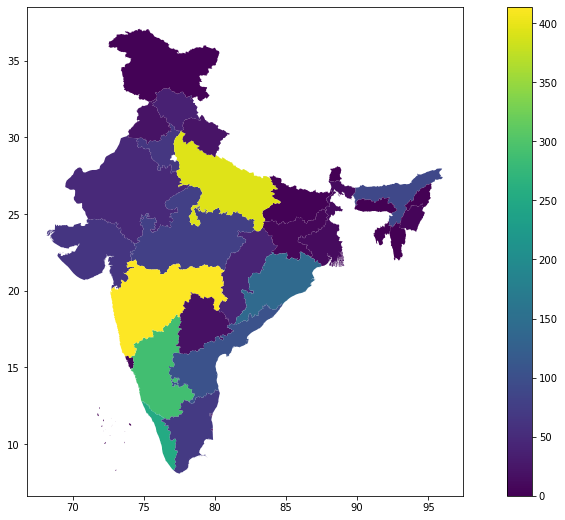

In [45]:
merged_df = map_df.set_index('States/UTs').join(total_cyber_crimes.set_index('state')) 
print("CYBER CRIME IN INDIA")
merged_df.plot('total_crime', figsize = (16, 9), legend = True)
plt.savefig("overall.png")


Literacy reate in INDIA


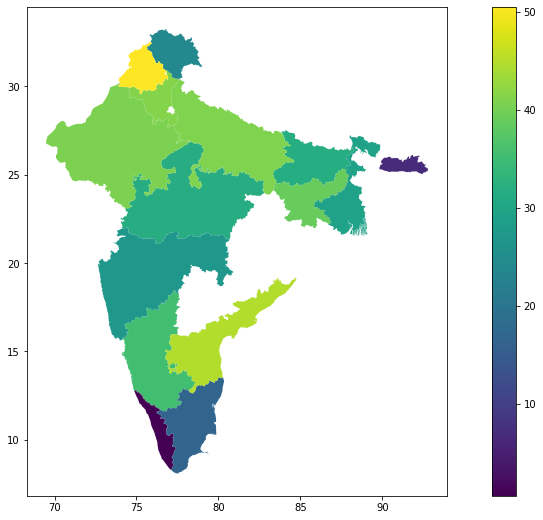

In [46]:
merged_df = map_df.set_index('States/UTs').join(illiterates_data.set_index('States')) 
print("Literacy reate in INDIA")
merged_df.plot('Illiterates (in percent)', figsize = (16, 9), legend = True)
plt.savefig("literacy.png")


Literacy rate for primary students in INDIA


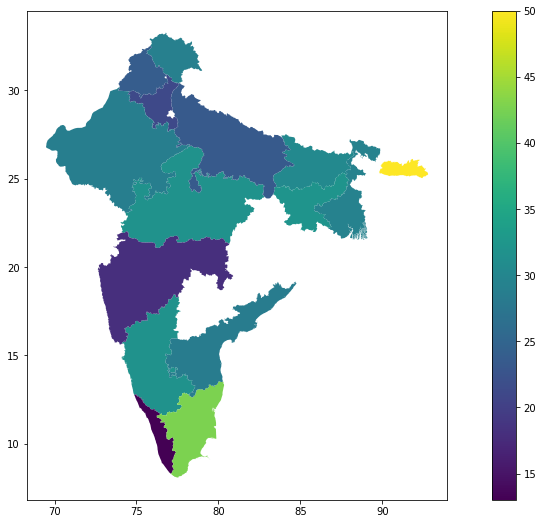

In [47]:
print("Literacy rate for primary students in INDIA")
merged_df.plot('Primary(in percent)', figsize = (16, 9), legend = True)
plt.savefig("primary.png")


Literacy rate for middle students in INDIA


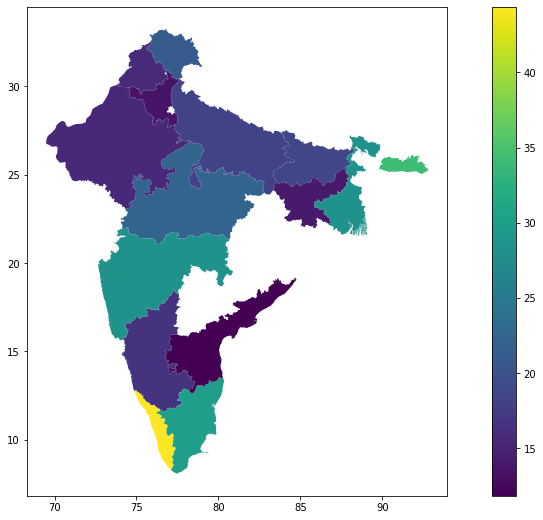

In [48]:
print("Literacy rate for middle students in INDIA")
merged_df.plot('Middle (in percent)', figsize = (16, 9), legend = True)
plt.savefig("middle.png")


Literacy rate for above metrics students in INDIA


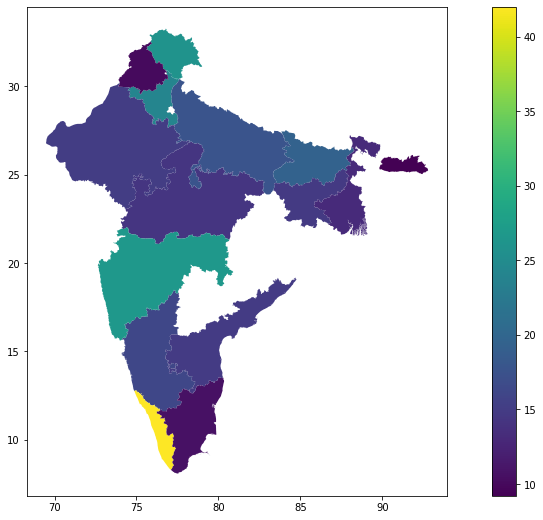

In [49]:
print("Literacy rate for above metrics students in INDIA")
merged_df.plot('Matric & Above (in percent)', figsize = (16, 9), legend = True)
plt.savefig("above-metric.png")


In [59]:

enrolment_states = enrolment_data["state_name"].unique()
state_wise_girls_enrolment = []

for i in range(0, len(enrolment_states)):
    class1girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_1_girls'].sum()
    class2girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_2_girls'].sum()
    class3girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_3_girls'].sum()
    class4girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_4_girls'].sum()
    class5girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_5_girls'].sum()
    class6girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_6_girls'].sum()
    class7girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_7_girls'].sum()
    class8girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_8_girls'].sum()
    class9girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_9_girls'].sum()

    state_wise_girls_enrolment.append([enrolment_states[i], class1girls, class2girls, class3girls, class4girls, class5girls, class6girls, class7girls, class8girls, class9girls])

state_wise_girls_enrolment_df = pd.DataFrame(state_wise_girls_enrolment, columns = ['states', 'class1girls','class2girls', 'class3girls', 'class5girls', 'class4girls', 'class6girls', 'class7girls', 'class8girls', 'class9girls'])
state_wise_girls_enrolment_df

state_wise_girls_enrolment_df.to_csv("state_wise_girls_enrolment.csv")

37 35


FOR CLASS 1 GIRLS ONLY


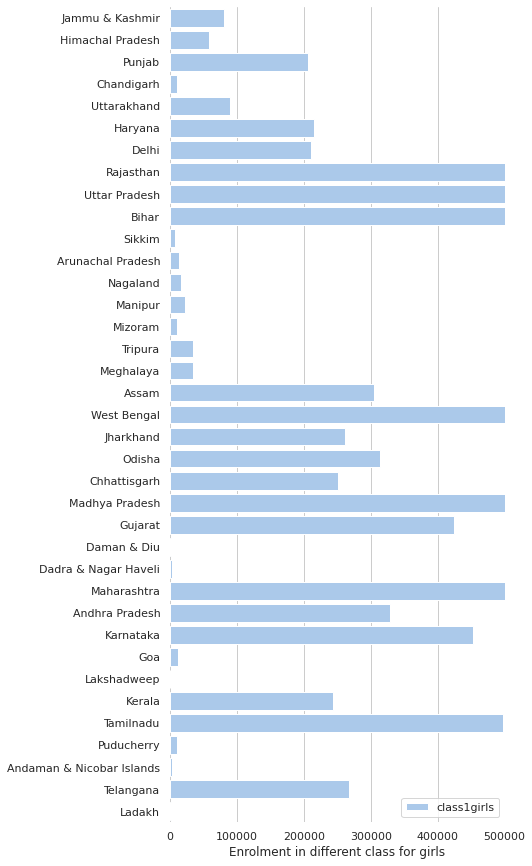

In [84]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
print("FOR CLASS 9 GRLS ONLY")
sns.barplot(x="class9girls", y="states", data=state_wise_girls_enrolment_df,  label="class9girls", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 500000), ylabel="",
       xlabel="Enrolment in different class for girls")
sns.despine(left=True, bottom=True)

In [81]:
t  = state_wise_girls_enrolment_df.sum(axis=1, numeric_only=True) 
state_wise_girls = pd.DataFrame(list(zip(enrolment_states, t)), columns =['states', 'total_girls_enrolled']) 

state_wise_girls

,states,total_girls_enrolled
0,Jammu & Kashmir,877474
1,Himachal Pradesh,493711
2,Punjab,1944582
3,Chandigarh,84592
4,Uttarakhand,868363
5,Haryana,2038633
6,Delhi,1591507
7,Rajasthan,6375852
8,Uttar Pradesh,18158687
9,Bihar,10632057


FOR ALL ENROLLED GIRLS


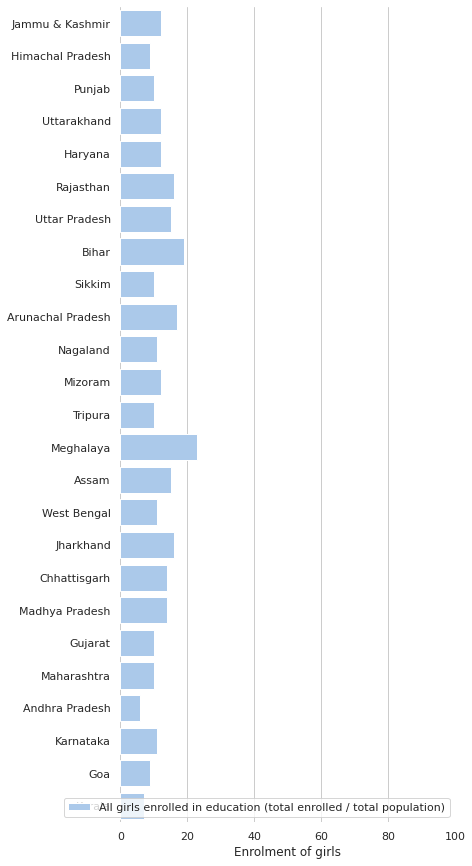

In [119]:
state_wise_population = pd.read_csv("./population-state-wise.csv")
remove_delimiter = state_wise_population["population"].str.replace(",", "")
remove_delimiter2 = state_wise_population["states"].str.replace("#", "")

state_wise_population["population"] = remove_delimiter
state_wise_population["states"] = remove_delimiter2

girl_enrolled_in_percentage = []

for i in range(0, len(state_wise_girls["states"]) - 1):
    for j in range(0, len(state_wise_population) - 1):
        if state_wise_girls["states"][i].lower() == state_wise_population["states"][j].lower():
            girls_percentage_of_a_state = ((float(state_wise_girls["total_girls_enrolled"][i]) / float(state_wise_population["population"][j])) * 100)
            girl_enrolled_in_percentage.append([state_wise_girls["states"][i],  int(girls_percentage_of_a_state) ])


girl_enrolled_in_percentage_df = pd.DataFrame(girl_enrolled_in_percentage, columns=["states", "girls_enrolled_percentage"])
girl_enrolled_in_percentage_df


sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
print("FOR ALL ENROLLED GIRLS")
sns.barplot(x="girls_enrolled_percentage", y="states", data=girl_enrolled_in_percentage_df,  label="All girls enrolled in education (total enrolled / total population)", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Enrolment of girls")
sns.despine(left=True, bottom=True)

Girls enrolment for education accross country


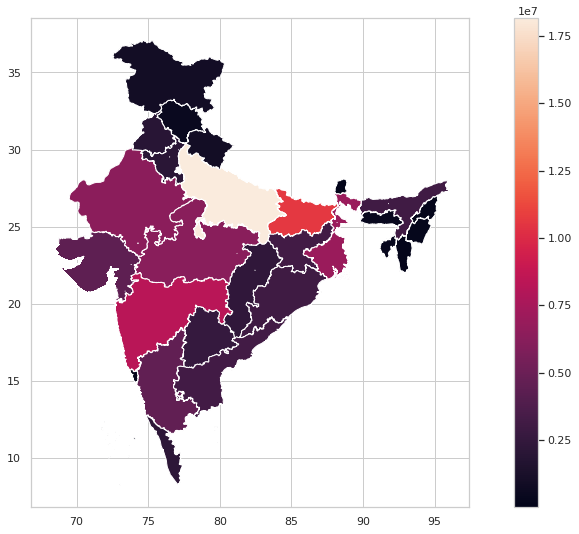

In [82]:
merged_df = map_df.set_index('States/UTs').join(state_wise_girls.set_index('states')) 
print("Girls enrolment for education accross country")
merged_df.plot('total_girls_enrolled', figsize = (16, 9), legend = True)
plt.savefig("girls-enrolled.png")
